In [3]:
import networkx as nx
from thewalrus import hafnian
import numpy as np
import random 
import matplotlib.pyplot as plt

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({"font.size": 16})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True

# Number of vertexes
n = 256

G1 = nx.Graph(np.load(f"./Data/G1.npy"))
G2 = nx.Graph(np.load(f"./Data/G2.npy"))
G3 = nx.Graph(np.load(f"./Data/G3.npy"))
G4 = nx.Graph(np.load(f"./Data/G4.npy"))

np.max(np.load('./Data/G4/G0_256.npy')-np.load('./Data/G4.npy'))

0.0

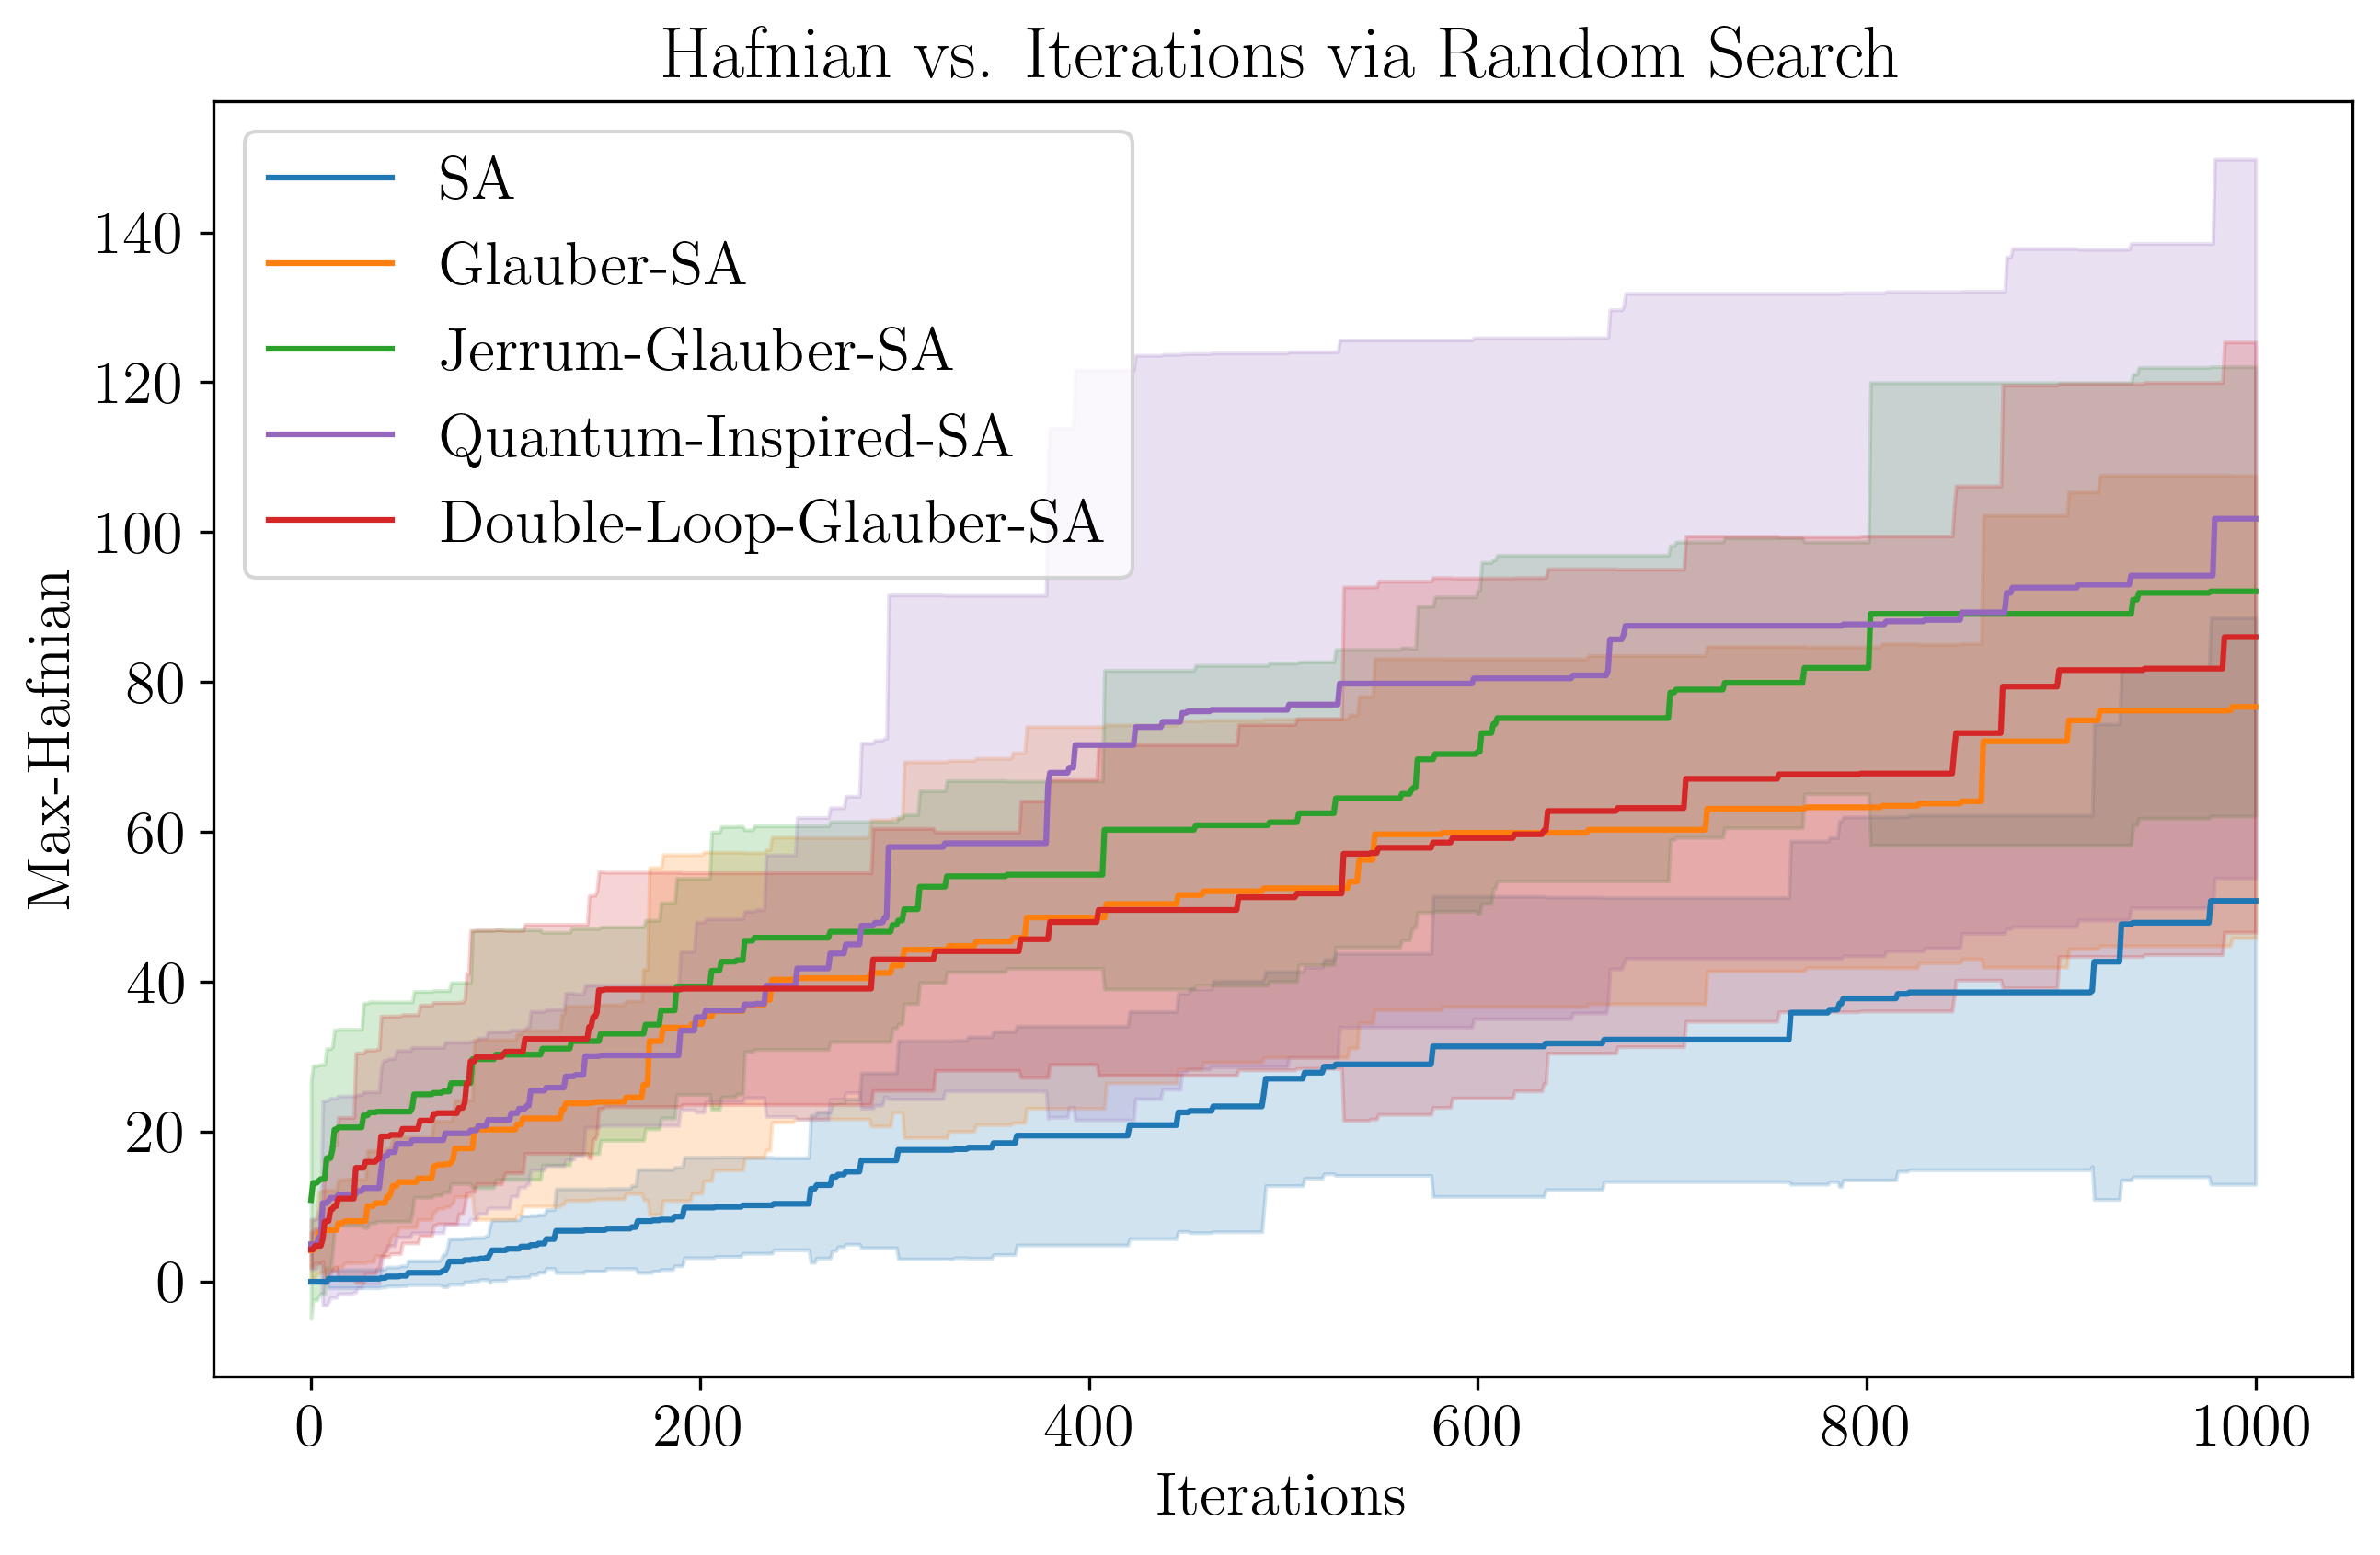

In [ ]:
n = 256
iteration = 1000
method = 'SA'
function = 'hafnian'  # Options: 'hafnian', 'density'
save = False

if function == 'hafnian':
    G = 'G2'
elif function == 'density':
    G = 'G1'
    
# G = 'G4'  # Uncomment to use G4

plt.figure(figsize=(10, 6), dpi=300)

max_density_list = np.load(f"./Data/{G}/{method}_{function}_list.npy")
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

plt.plot(mean_density_values, label=f"{method}", color='C0')
plt.fill_between(range(iteration+1), mean_density_values - std_density_values, mean_density_values + std_density_values, color = 'C0', alpha=0.2)

glauber_max_density_list= np.load(f"./Data/Glauber_{method}_{function}_list.npy")
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

plt.plot(mean_glauber_density_values, label=f"Glauber-{method}", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_density_values - std_glauber_density_values, mean_glauber_density_values + std_glauber_density_values, color = 'C1', alpha=0.2)

jerrum_glauber_max_density_list= np.load(f"./Data/{G}/jerrum_glauber_{method}_{function}_list.npy")
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

plt.plot(mean_jerrum_glauber_density_values, label=f"Jerrum-Glauber-{method}", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_density_values - std_jerrum_glauber_density_values, mean_jerrum_glauber_density_values + std_jerrum_glauber_density_values, color = 'C2', alpha=0.2)
 
if function == 'hafnian':
    quantum_inspired_max_density_list = np.load(f"./Data/{G}/quantum_inspired_{method}_{function}_list.npy")
    mean_quantum_inspired_density_values = np.mean(quantum_inspired_max_density_list, axis=0)
    std_quantum_inspired_density_values = np.std(quantum_inspired_max_density_list, axis=0)

    plt.plot(mean_quantum_inspired_density_values, label=f"Quantum-Inspired-{method}", color='C4')
    plt.fill_between(range(iteration+1), mean_quantum_inspired_density_values - std_quantum_inspired_density_values, mean_quantum_inspired_density_values + std_quantum_inspired_density_values, color = 'C4', alpha=0.2)

if G == 'G4':
    double_loop_glauber_max_density_list = np.load(f"./Data/{G}/double_loop_glauber_{method}_{function}_list.npy", )
    mean_double_loop_glauber_density_values = np.mean(double_loop_glauber_max_density_list, axis=0)
    std_double_loop_glauber_density_values = np.std(double_loop_glauber_max_density_list, axis=0)

    plt.plot(mean_double_loop_glauber_density_values, label=f"Double-Loop-Glauber-{method}", color='C3')
    plt.fill_between(range(iteration+1), mean_double_loop_glauber_density_values - std_double_loop_glauber_density_values, mean_double_loop_glauber_density_values + std_double_loop_glauber_density_values, color = 'C3', alpha=0.2)

Function = function.capitalize()

plt.xlabel("Iterations")
if function == 'hafnian':
    plt.ylabel(f"Max-{Function}")
elif function == 'density':
    plt.ylabel(f"Max-{function}")
    
plt.title(f"{Function} vs. Iterations via Random Search")
plt.legend(loc = "best")

if save == True:
    if method == 'RS':
        plt.savefig(f"./Figure/{function}_random_search.pdf")
    elif method == 'SA':
        plt.savefig(f"./Figure/{function}_simulated_annealing.pdf")
        
plt.show()

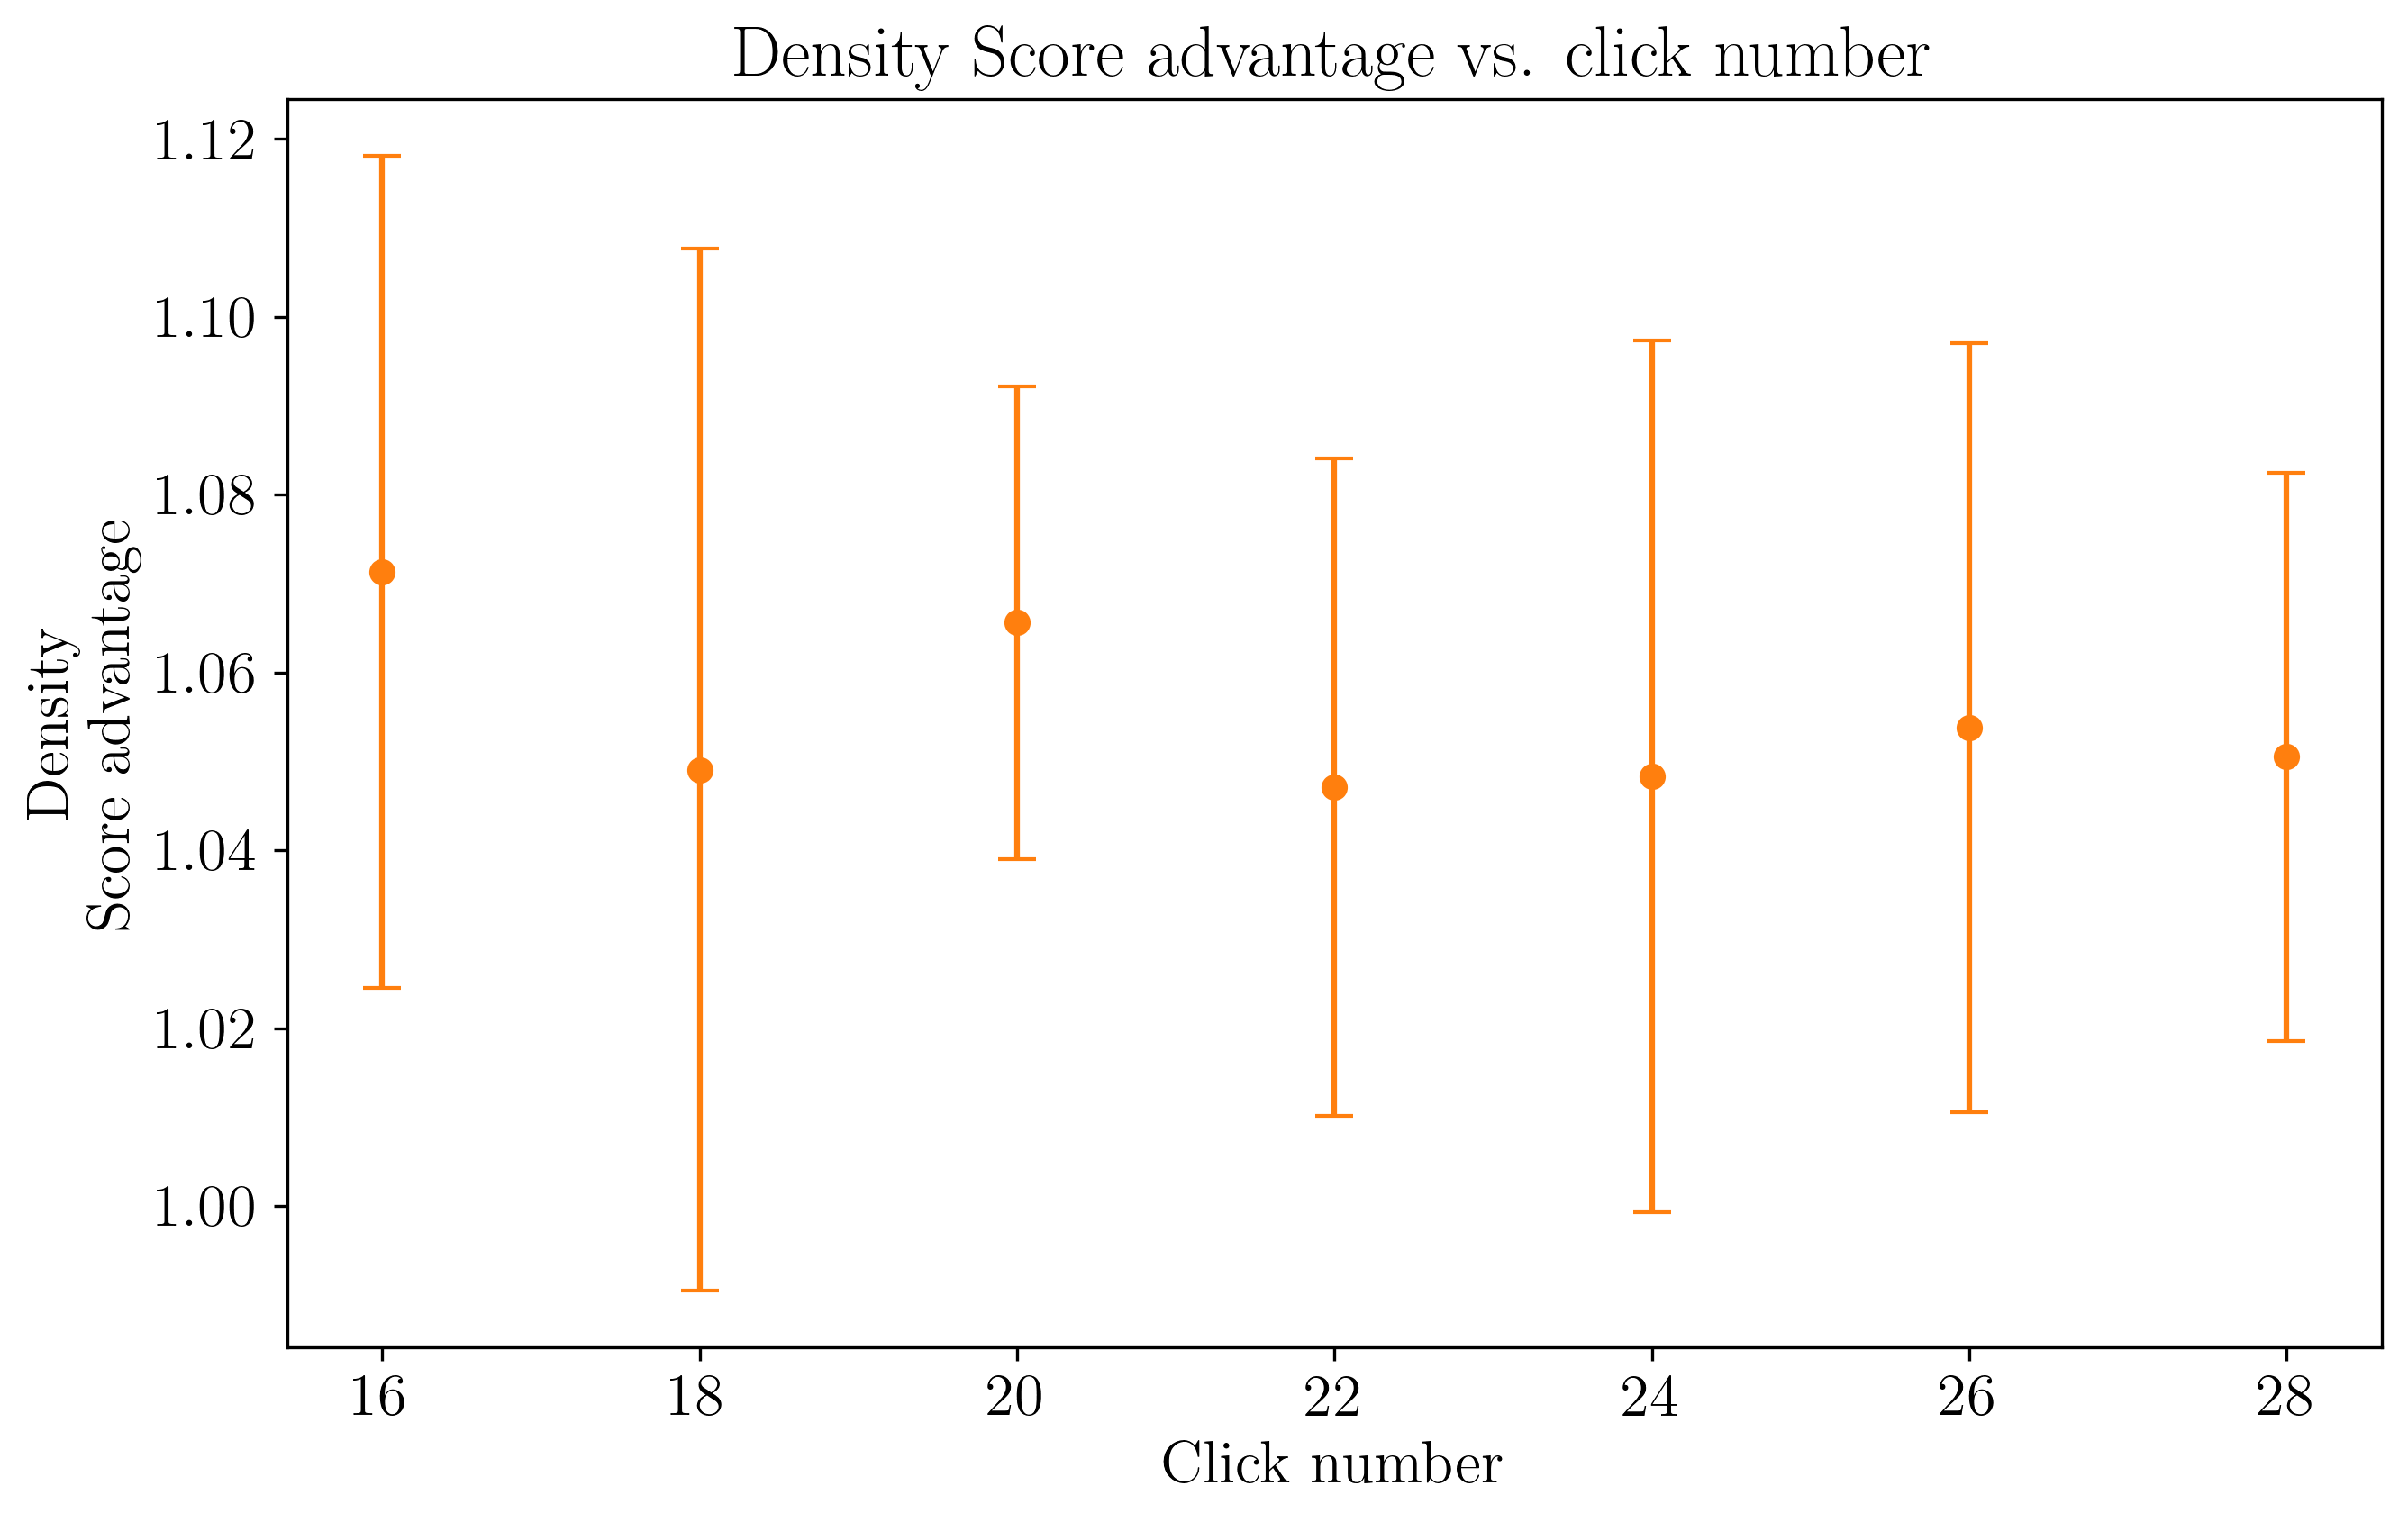

In [ ]:
G = G3
n = 256
iteration = 100
function = 'density'  # Options: 'hafnian', 'density'
save = False

click_number_list = [16, 18, 20, 22, 24, 26, 28]

plt.figure(figsize=(10, 6), dpi=300)
for k in click_number_list:
    score_advantage = np.load(f"./Data/{G}/{function}_score_advantage_{k}.npy")
    mean = np.mean(score_advantage, axis=0)
    std = np.std(score_advantage, axis=0)
    if function == 'hafnian':
        plt.errorbar(k, mean, yerr = std, fmt='o', color='C0', ecolor='C0', capsize=5)
    elif function == 'density':
        plt.errorbar(k, mean, yerr = std, fmt='o', color='C1', ecolor='C1', capsize=5)
    
Function = function.capitalize()

plt.xlabel('Click number')
plt.ylabel(f'{Function} \n Score advantage')
plt.title(f'{Function} Score advantage vs. click number')

if save == True:
    plt.savefig(f'./Figure/{Function}_score_advantage.pdf')
plt.show()

In [3]:
from Glauber_hafnian import *
    
for _ in range(2):
    subgraph = double_loop_glauber_dynamics(G4, k=80, c=0.8, mixing_time=1000, outer=1)
    
len(list(subgraph.nodes()))

80

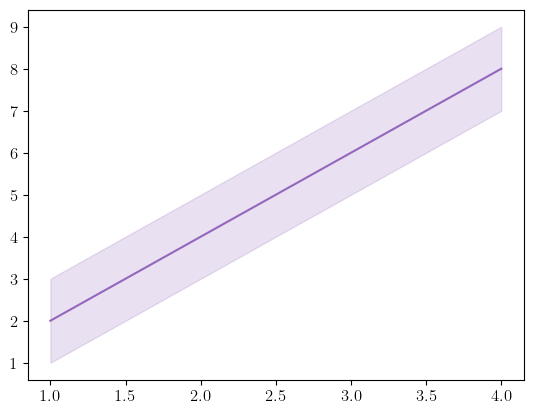

In [ ]:
x = np.array([1,2,3,4])
y = 2 * x

plt.plot(x,y,color = 'C4')
plt.fill_between(x, y-1, y+1, color = 'C4', alpha=0.2)

In [ ]:
n = "bipartite"
method = 'RS'
function = 'density'
iteration = 1000

max_density_list = np.load(f"./Data/{G}/{method}_{function}_list.npy")
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

glauber_max_density_list= np.load(f"./Data/Glauber_{method}_{function}_list.npy")
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

jerrum_glauber_max_density_list= np.load(f"./Data/{G}/jerrum_glauber_{method}_{function}_list.npy")
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

quantum_inspired_max_density_list = np.load(f"./Data/{G}/double_loop_glauber_{method}_{function}_list.npy")
mean_quantum_inspired_density_values = np.mean(quantum_inspired_max_density_list, axis=0)
std_quantum_inspired_density_values = np.std(quantum_inspired_max_density_list, axis=0)

print(mean_density_values[-1])
print(mean_glauber_density_values[-1]+std_glauber_density_values[-1])
print(mean_glauber_density_values[-1]/mean_density_values[-1], mean_jerrum_glauber_density_values[-1]/mean_density_values[-1], mean_quantum_inspired_density_values[-1]/mean_density_values[-1])
print((mean_glauber_density_values[-1]+std_glauber_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]), (mean_jerrum_glauber_density_values[-1]+std_jerrum_glauber_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]), (mean_quantum_inspired_density_values[-1]+std_quantum_inspired_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]))

4.571249999999999
5.040497797314082
1.0902378999179658 1.0836751435602954 1.0937927262783704
1.0890667794565072 1.0877035181891472 1.0955946753348613
